<a href="https://colab.research.google.com/github/rfps09/Colab-Backup/blob/main/PytorchPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import transforms

class MLP(nn.Module):
    def __init__(self,input,output):
        super().__init__()
        self.layer1 = nn.Linear(input, 256)
        self.layer2 = nn.Linear(256,128)
        self.layer3 = nn.Linear(128,output)

    def forward(self,x):
        x = torch.flatten(x,start_dim=1)
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
import torch
import torchvision
from torchvision import transforms
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.Resize(size=(100, 100)),transforms.ToTensor()])
data_path = 'drive/MyDrive/TensorFlow/DataSets/DogsAndCats/'
train_data_path = data_path + 'train/'
test_data_path = data_path + 'test/'

dir_train = torchvision.datasets.ImageFolder(train_data_path,transform=transform)
train_data = torch.utils.data.DataLoader(dir_train,batch_size=32,shuffle=True,num_workers=0)

dir_test = torchvision.datasets.ImageFolder(test_data_path,transform=transform)
test_data = torch.utils.data.DataLoader(dir_test,batch_size=32,shuffle=True,num_workers=0)

In [ ]:
mlp = MLP(3*100*100,2)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
def train_one_epoch(NeuralNet,Loss,Optimizer,data_treino):
    NeuralNet.train(True)
    current_loss = 0.0
    current_accuracy = 0.0
    total_samples = 0

    for i,data in enumerate(data_treino):
        x,y = data
        Optimizer.zero_grad()
        output = NeuralNet(x)
        loss = Loss(output,y)
        loss.backward()
        Optimizer.step()
        current_loss += loss.item()
        
        output = output.argmax(dim=1)
        batch_accuracy = torch.eq(output,y)
        batch_accuracy = batch_accuracy.sum()
        current_accuracy += batch_accuracy
        total_samples += len(x)

    return current_loss/(i+1), current_accuracy/total_samples

In [ ]:
def validation_one_epoch(NeuralNet,Loss,val_data):
    NeuralNet.train(False)
    current_loss = 0.0
    current_accuracy = 0.0
    total_samples = 0
    for i,data in enumerate(val_data):
        x,y = data
        output = NeuralNet(x)
        loss = Loss(output,y)
        current_loss += loss.item()

        output = output.argmax(dim=1)
        batch_accuracy = torch.eq(output,y)
        batch_accuracy = batch_accuracy.sum()
        current_accuracy += batch_accuracy
        total_samples += len(x)
    return current_loss/(i+1), current_accuracy/total_samples

In [ ]:
epochs = 50
train_loss_all_epoch = []
train_accuracy_all_epoch = []
val_loss_all_epoch = []
val_accuracy_all_epoch = []

for epoch in range(epochs):
    print(f'Starting epoch {epoch+1}')

    train_loss_per_epoch, train_accuracy_per_epoch = train_one_epoch(mlp,loss_function,optimizer,train_data)

    train_loss_all_epoch.append(train_loss_per_epoch)
    train_accuracy_all_epoch.append(train_accuracy_per_epoch)

    val_loss_per_epoch,val_accuracy_per_epoch = validation_one_epoch(mlp,loss_function,test_data)
    
    val_loss_all_epoch.append(val_loss_per_epoch)
    val_accuracy_all_epoch.append(val_accuracy_per_epoch)

    print(f'Train Loss: {train_loss_per_epoch}')
    print(f'Val Loss: {val_loss_per_epoch}')
    print(f'Train Accuracy: {train_accuracy_per_epoch}')
    print(f'Val Accuracy: {val_accuracy_per_epoch}')
    print()

print('Training process has finished.')

Starting epoch 1
Train Loss: 0.6915544602606032
Val Loss: 0.7086558103561401
Train Accuracy: 0.5332136154174805
Val Accuracy: 0.5

Starting epoch 2
Train Loss: 0.6899432076348199
Val Loss: 0.6972510099411011
Train Accuracy: 0.5152603387832642
Val Accuracy: 0.4714285731315613

Starting epoch 3
Train Loss: 0.6813051468796201
Val Loss: 0.7022373080253601
Train Accuracy: 0.5780969262123108
Val Accuracy: 0.4571428596973419

Starting epoch 4
Train Loss: 0.6796916855706109
Val Loss: 0.7233025670051575
Train Accuracy: 0.576301634311676
Val Accuracy: 0.4928571283817291

Starting epoch 5
Train Loss: 0.6728975044356452
Val Loss: 0.6941344380378723
Train Accuracy: 0.5780969262123108
Val Accuracy: 0.48571428656578064

Starting epoch 6
Train Loss: 0.6629213160938687
Val Loss: 0.6963035583496093
Train Accuracy: 0.6193895936012268
Val Accuracy: 0.4714285731315613

Starting epoch 7
Train Loss: 0.655433949497011
Val Loss: 0.7110712766647339
Train Accuracy: 0.631956934928894
Val Accuracy: 0.4785714149475

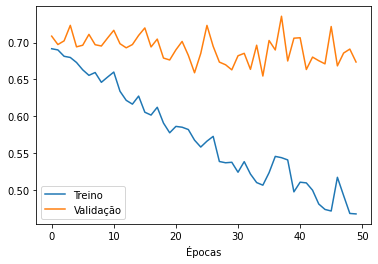

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss_all_epoch)
plt.plot(val_loss_all_epoch)
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')

plt.show()

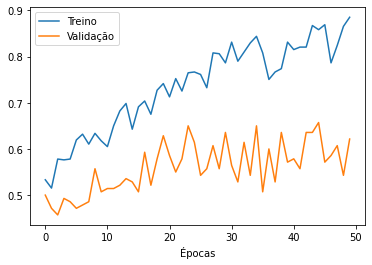

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_accuracy_all_epoch)
plt.plot(val_accuracy_all_epoch)
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

mlp.train(False)

all_pred = torch.tensor([])
all_true = torch.tensor([])
for data in test_data:
    x_test,y_test = data
    y_pred = mlp(x_test)
    y_pred = torch.Tensor.argmax(y_pred, dim=1)
    all_pred = torch.cat((all_pred,y_pred))
    all_true = torch.cat((all_true,y_test))
    
print(classification_report(all_true,all_pred,zero_division=1))

              precision    recall  f1-score   support

         0.0       0.60      0.76      0.67        70
         1.0       0.67      0.49      0.56        70

    accuracy                           0.62       140
   macro avg       0.63      0.62      0.61       140
weighted avg       0.63      0.62      0.61       140

